[Sascha Spors](https://orcid.org/0000-0001-7225-9992),
Professorship Signal Theory and Digital Signal Processing,
[Institute of Communications Engineering (INT)](https://www.int.uni-rostock.de/),
Faculty of Computer Science and Electrical Engineering (IEF),
[University of Rostock, Germany](https://www.uni-rostock.de/en/)

# Tutorial Digital Signal Processing (Digitale Signalverarbietung)

Winter Semester 2021/2022 (Bachelor Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer [frank.schultz@uni-rostock.de](https://orcid.org/0000-0002-3010-0294) / https://github.com/fs446

**Main autor** of this notebook: https://github.com/robhau

This code generates and renders the **graphics for the DFT tutorial**
https://github.com/spatialaudio/digital-signal-processing-exercises/blob/master/dft/dft_windowing_tutorial/dft_windowing_tutorial.tex
and bases on its graphics/the matlab code which originally created the plots.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import random as rd
from scipy.special import diric
import scipy.signal.windows as windows

The following code generates 2 plots of the real and imaginary part for the second and third Fourier-Matrix columns' elements, i.e. $\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}1\cdot k}$ and $\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}2\cdot k}$, $N\in\mathbb{R}$. $N$ has to be $>3$, otherwise obviously a third column would not exist. You can manipulate the $N\times N$ Fourier Matrix by changing $N$. Make sure to change the path in $\texttt{fig.savefig}$ to preserve the existing plot if you want to do so.

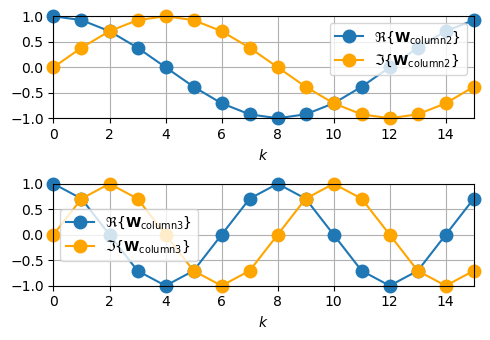

In [2]:
N = 16
k = np.arange(0, N, 1)
y1 = np.exp(2j*np.pi/N*k)
y2 = np.exp(2j*np.pi/N*2*k)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(5, 3.5))
ax1.grid(True)
ax1.set_xticks(np.arange(0, N-1, 2))
ax1.set_yticks(np.arange(-1, 1.5, 0.5))
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, N-1)
ax1.plot(k, np.real(y1),
         label="$\Re\{\mathbf{W}_{\mathrm{column2}}\}$",
         marker="o",
         ms=9, clip_on=False)
ax1.plot(k, np.imag(y1),
         label="$\Im\{\mathbf{W}_{\mathrm{column2}}\}$",
         color="orange", marker="o", ms=9, clip_on=False)
ax1.legend()
ax1.set_xlabel('$k$')
ax2.set_xlabel('$k$')
ax2.grid(True)
ax2.set_xticks(np.arange(0, N-1, 2))
ax2.set_yticks(np.arange(-1, 1.5, 0.5))
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, N-1)
ax2.plot(k, np.real(y2),
         label="$\Re\{\mathbf{W}_{\mathrm{column3}}\}$",
         marker="o", ms=9, clip_on=False)
ax2.plot(k, np.imag(y2),
         label="$\Im\{\mathbf{W}_{\mathrm{column3}}\}$",
         color="orange", marker="o", ms=9, clip_on=False)
ax2.legend()
fig.tight_layout()
fig.savefig('graphics/dft_eigensignals_columns.pdf')

The following two code blocks create two meshgrids. The first contains the phase of each $N\times N$ Fourier-Matrix element while the second the absolute phase. You only have to care about the second code block. With $\texttt{pcolor$\_$mesh$\_$fourier$\_$matrix$\_$abs$\_$and$\_$no$\_$abs(N,path)}$ you can produce the image. If you set path to a valid string, the image is stored.

In [3]:
def pcolor_mesh_fourier_matrix(N, ax, fig, abs_flag=False):
    """
    Parameters
    ------------
    N: int > 0
        dimension of the N x N Fourier Matrix
    ax : ax object
    fig : fig object that contains ax
    abs : bool, optional
        if true, plot the absolute phase
    """
    if N <= 0:
        print("N has to be greater than 0")
        return
    data = np.zeros((N, N))
    for i in range(0, N):
        for j in range(0, N):
            if abs_flag is False:
                data[i, j] = np.angle(np.exp(2j*np.pi/N*i*j), deg=True)
            else:
                data[i, j] = np.abs(np.angle(np.exp(2j*np.pi/N*i*j), deg=True))

    """ 
    Create axes object for the colorbar, same heigth as the meshgrid
    Solution for this was found here:
        https://moonbooks.org/Articles/How-to-match-the-colorbar-size-with-the-figure-size-in-matpltolib-/,
        last access 17.12.2021
            
    """
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # create colorbar
    fig.colorbar(ax.pcolormesh(data, edgecolors='none', cmap='RdBu', vmax=180, vmin=-180),
                 ax=ax, cax=cax, ticks=np.linspace(start=-180, stop=180, num=9, endpoint=True))
    """
    The idea how to shift the ticks is from 
    https://stackoverflow.com/questions/34928370/setting-properly-aligned-axis-labels-on-matplotlib-pcolor-plot, User tmdavidson,
    last access 06.12.2021
    """
    ticks = np.arange(start=0, stop=N, step=np.ceil(N/10), dtype=int)
    ax.set_xticks(ticks+0.5)
    ax.set_xticklabels(ticks)
    ax.set_yticks(ticks+0.5)
    ax.set_yticklabels(ticks)
    ax.set_ylabel('k')
    ax.set_xlabel('$\mu$')
    if abs_flag is True:
        ax.set_title(
            '$|\mathrm{arg}(W_N^{k\cdot\mu})|$ in degree, $N$='+str(N))
    else:
        ax.set_title(
            '$\mathrm{arg}(W_N^{k\cdot\mu})$ in degree, $N$='+str(N))
    ax.set_aspect(aspect='equal', adjustable='box')

In [4]:
def pcolor_mesh_fourier_matrix_abs_and_no_abs(N, path=None):
    """
    Parameters
    -----------
    N : unsinged int > 0
        dimension of the N x N Fourier Matrix
    path : string, optional
        if the path is valid, the fig will be saved
    """
    if N <= 0:
        print("N has to be greater than zero")
        return
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 3))
    pcolor_mesh_fourier_matrix(N, ax1, fig, abs_flag=False)
    pcolor_mesh_fourier_matrix(N, ax2, fig, abs_flag=True)
    fig.tight_layout()
    if path != None:
        fig.savefig(path)

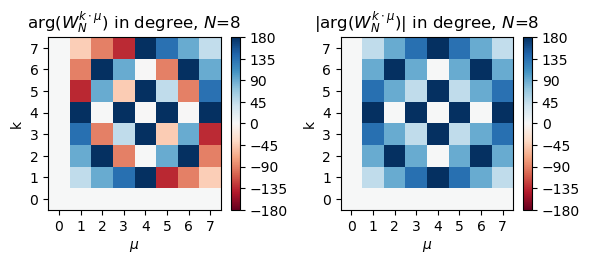

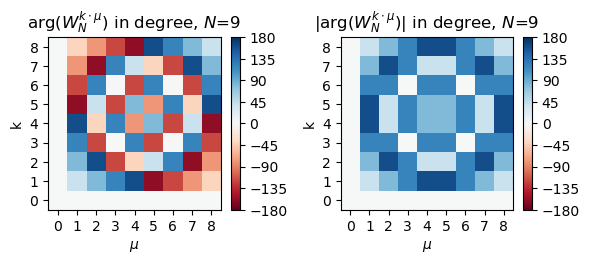

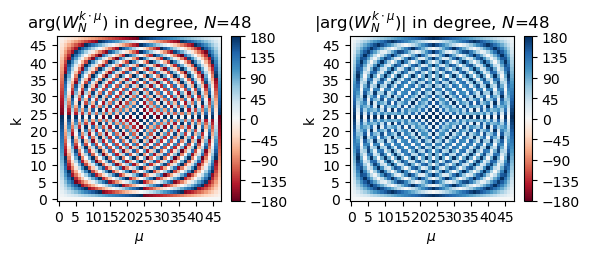

In [5]:
pcolor_mesh_fourier_matrix_abs_and_no_abs(
    8, 'graphics/TwiddleFactorMatrix_N8.pdf')
pcolor_mesh_fourier_matrix_abs_and_no_abs(
    9, 'graphics/TwiddleFactorMatrix_N9.pdf')
pcolor_mesh_fourier_matrix_abs_and_no_abs(
    48, 'graphics/TwiddleFactorMatrix_N48.pdf')

In [6]:
def plot_dft_real_imag_mag_ph_periodicity(N, path):
    """
    Plots the real part, the imaginary part, the magnitude and the phase of the discret Fouriertransformation of a
    random N-length sequence (3 periods).
    Parameters
    ----------
    N : int > 0
        length of the random sequence
    path: string, optional
        if the path is valid, the plots will be saved.
    """
    rd.seed(17)
    x = np.zeros(N)
    for i in range(0, N):
        x[i] = rd.random()
    x = (x-1/2)*2+1/10
    X = np.fft.fft(x)
    k1 = np.arange(-N, 0, 1)
    k2 = np.arange(0, N, 1)
    k3 = np.arange(N, 2*N, 1)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
        nrows=2, ncols=2, figsize=(6, 3))
    # Plot the real part of X
    ax1.plot(k1, np.real(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax1.plot(k2, np.real(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax1.plot(k3, np.real(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax1.grid(True)
    ax1.set_ylabel('$\mathrm{Re}\{X[\mu]\}$')
    ax1.set_xlabel('$\mu$')
    ax1.set_xticks(np.arange(-N, 2*N, np.ceil(N/4)))
    ax1.set_yticks(np.array([]))
    ax1.set_xlim(-N, 2*N-1)
    # Plot the imag part of X
    ax2.plot(k1, np.imag(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax2.plot(k2, np.imag(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax2.plot(k3, np.imag(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax2.grid(True)
    ax2.set_ylabel('$\mathrm{Im}\{X[\mu]\}$')
    ax2.set_xlabel('$\mu$')
    ax2.set_xticks(np.arange(-N, 2*N, np.ceil(N/4)))
    ax2.set_yticks(np.array([]))
    ax2.set_xlim(-N, 2*N-1)
    # Plot the magnitude of X
    ax3.plot(k1, np.abs(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax3.plot(k2, np.abs(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax3.plot(k3, np.abs(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax3.grid(True)
    ax3.set_ylabel('$|X[\mu]|$')
    ax3.set_xlabel('$\mu$')
    ax3.set_xticks(np.arange(-N, 2*N, np.ceil(N/4)))
    ax3.set_yticks(np.array([]))
    ax3.set_xlim(-N, 2*N-1)
    # Plot the phase of X
    ax4.plot(k1, np.angle(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax4.plot(k2, np.angle(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax4.plot(k3, np.angle(X), color='C7', marker="o",
             ms=10, mec='C7', mfc='none', clip_on=False)
    ax4.grid(True)
    ax4.set_ylabel('$\mathrm{arg}(X[\mu])$')
    ax4.set_xlabel('$\mu$')
    ax4.set_xticks(np.arange(-N, 2*N, np.ceil(N/4)))
    ax4.set_xlim(-N, 2*N-1)
    ax4.set_yticks(np.array([]))
    fig.tight_layout()

    if path != None:
        fig.savefig(path)

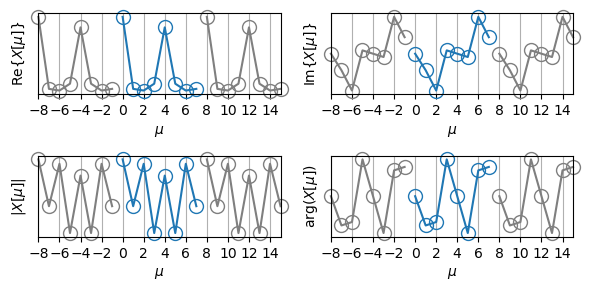

In [7]:
plot_dft_real_imag_mag_ph_periodicity(N=8, path='graphics/Periodicity_DFT.pdf')

In [8]:
def plot_dft_real_imag_mag_ph_symmetrie(N, path=None):
    """
    Plots the real part, the imaginary part, the magnitude and the phase of the discret Fouriertransformation of a
    random N-length sequence (1 period) to show symmetry.
    Parameters
    ----------
    N : int > 0
        length of the random sequence
    path: string, optional
        if the path is valid, the plots will be saved.
    """
    rd.seed(17)
    x = np.zeros(N)
    for i in range(0, N):
        x[i] = rd.random()
    x = (x-1/2)*2+0.1
    X = np.fft.fft(x)
    k = np.arange(0, N, 1)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 3))
    fig.tight_layout()
    # Plot real part of X
    ax1.plot(k, np.real(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax1.set_ylabel('$\mathrm{Re}\{X[\mu]\}$')
    ax1.set_xlabel('$\mu$')
    d = np.abs(np.amax(np.real(X))-np.amin(np.real(X)))
    if d == 0:
        d = 0.1
    ax1.set_xticks(np.arange(0, N+1, np.ceil(N/10)))
    ax1.set_yticks(np.array([]))
    ax1.set_ylim(np.amin(np.real(X))-1/5*d, np.amax(np.real(X))+1/5*d)
    ax1.plot([N/2, N/2], [np.amin(np.real(X))-d,
             np.amax(np.real(X))+d], color='C1', lw=2)
    ax1.set_xlim(0, N-1)
    # Plot imag part of X
    ax2.plot(k, np.imag(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax2.set_ylabel('$\mathrm{Im}\{X[\mu]\}$')
    ax2.set_xlabel('$\mu$')
    d = np.abs(np.amax(np.imag(X))-np.amin(np.imag(X)))
    if d == 0:
        d = 0.1
    ax2.set_xticks(np.arange(0, N+1, np.ceil(N/10)))
    ax2.set_yticks(np.array([]))
    ax2.set_ylim(np.amin(np.imag(X))-1/5*d, np.amax(np.imag(X))+1/5*d)
    ax2.set_xlim(0, N-1)
    if N % 2 == 0:
        ax2.plot(N/2, np.imag(X[int(N/2)]), ls='none', marker='o',
                 mew=3, ms=10, mec='C0', mfc='C1', clip_on=False)
    else:
        ax2.plot(N/2, (np.imag(X[int(N/2)])+np.imag(X[int(N/2)+1]))/2, ls='none',
                 marker='o', mew=3, ms=10, mec='C0', mfc='C1', clip_on=False)
    # Plot the magnitude of X
    ax3.plot(k, np.abs(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax3.set_ylabel('$|X[\mu]|$')
    ax3.set_xlabel('$\mu$')
    d = np.abs(np.amax(np.abs(X))-np.amin(np.abs(X)))
    if d == 0:
        d = 0.1
    ax3.set_xticks(np.arange(0, N+1, np.ceil(N/10)))
    ax3.set_yticks(np.array([]))
    ax3.set_ylim(np.amin(np.abs(X))-1/5*d, np.amax(np.abs(X))+1/5*d)
    ax3.plot([N/2, N/2], [np.amin(np.abs(X))-d,
             np.amax(np.abs(X))+d], color='C1', lw=2)
    ax3.set_xlim(0, N-1)
    # Plot the phase of X
    ax4.plot(k, np.angle(X), color='C0', marker="o",
             ms=10, mec='C0', mfc='none', clip_on=False)
    ax4.set_ylabel(r'$\mathrm{arg}\left(X[\mu]\right)$')
    ax4.set_xlabel('$\mu$')
    d = np.abs(np.amax(np.angle(X))-np.amin(np.angle(X)))
    if d == 0:
        d = 0.1
    ax4.set_xticks(np.arange(0, N, np.ceil(N/10)))
    ax4.set_yticks(np.array([]))
    ax4.set_ylim(np.amin(np.angle(X))-1/5*d, np.amax(np.angle(X))+1/5*d)
    ax4.set_xlim(0, N-1)
    if N % 2 == 0:
        ax4.plot(N/2, np.angle(X[int(N/2)]), ls='none', marker='o',
                 mew=3, ms=10, mec='C0', mfc='C1', clip_on=False)
    else:
        ax4.plot(N/2, (np.angle(X[int(N/2)])+np.angle(X[int(N/2)+1]))/2, ls='none',
                 marker='o', mew=3, ms=10, mec='C0', mfc='C1', clip_on=False)
    fig.tight_layout()
    if path != None:
        fig.savefig(path)

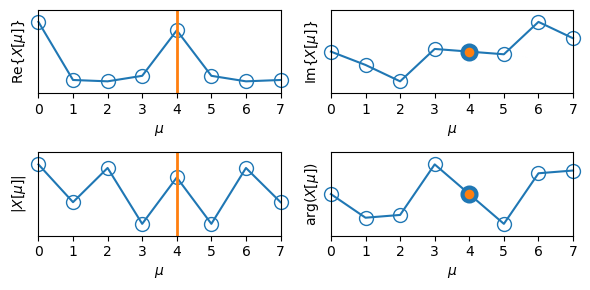

In [9]:
plot_dft_real_imag_mag_ph_symmetrie(N=8, path='graphics/Symmetry_DFT_N8.pdf')

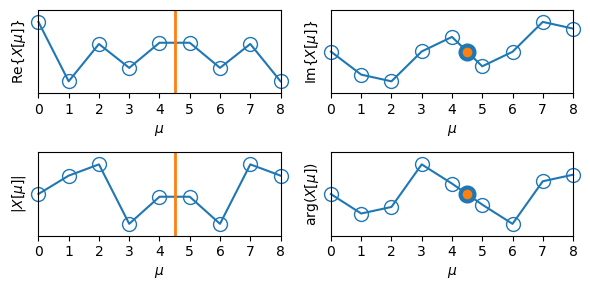

In [10]:
plot_dft_real_imag_mag_ph_symmetrie(N=9, path='graphics/Symmetry_DFT_N9.pdf')

The following code block prints two unit circles in the complex z-plane together with the solutions for $z^N=1$ with $N=4$ and $N=5$ respectively.

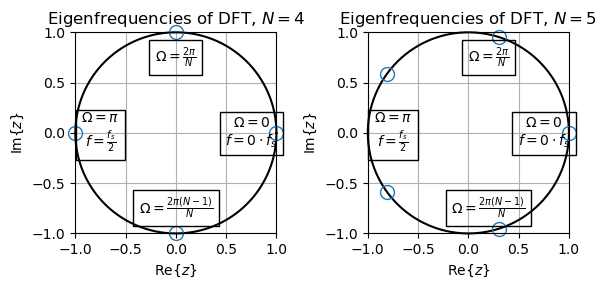

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
N = 4
t = np.arange(0, 2*np.pi, 1/100)
ax1.plot(np.cos(t), np.sin(t), color='black', clip_on=False)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_xticks(np.arange(-1, 1.5, 0.5))
ax1.set_yticks(np.arange(-1, 1.5, 0.5))
ax1.set_aspect(aspect='equal', adjustable='box')
ax1.set_title('Eigenfrequencies of DFT, '+r'$N = %d$' % (N))
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
k = np.arange(0, N, 1)
ax1.plot(np.cos(2*np.pi/N*k), np.sin(2*np.pi/N*k), ls='none',
         marker='o', ms=10, mec='C0', mfc='none', clip_on=False)
ax1.text(x=0.75, y=0, s='$\Omega=0$\n$f=0\cdot f_s$', ha='center',
         va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=-0.75, y=0, s=r'$\Omega=\pi$' '\n' r'$f=\frac{f_s}{2}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=0, y=0.75, s=r'$\Omega=\frac{2\pi}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=0, y=-0.75, s=r'$\Omega=\frac{2\pi(N-1)}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.grid(True)
N = 5
ax2.plot(np.cos(t), np.sin(t), color='black', clip_on=False)
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_xticks(np.arange(-1, 1.5, 0.5))
ax2.set_yticks(np.arange(-1, 1.5, 0.5))
ax2.set_aspect(aspect='equal', adjustable='box')
ax2.set_title('Eigenfrequencies of DFT, ' + r'$N = %d$' % (N))
k = np.arange(0, N, 1)
ax2.plot(np.cos(2*np.pi/N*k), np.sin(2*np.pi/N*k), ls='none',
         marker='o', ms=10, mec='C0', mfc='none', clip_on=False)
ax2.text(x=0.75, y=0, s='$\Omega=0$\n$f=0\cdot f_s$', ha='center',
         va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=-0.75, y=0, s=r'$\Omega=\pi$' '\n' r'$f=\frac{f_s}{2}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=0.2, y=0.75, s=r'$\Omega=\frac{2\pi}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=0.2, y=-0.75, s=r'$\Omega=\frac{2\pi(N-1)}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.grid(True)
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
fig.tight_layout()
fig.savefig('graphics/DFT_Eigenfrequencies_N4_N5.pdf')

The following code block prints two unit circles in the complex z-plane together with the solutions with $z^N=1$ for $N=8$ and $N=9$ respectively.

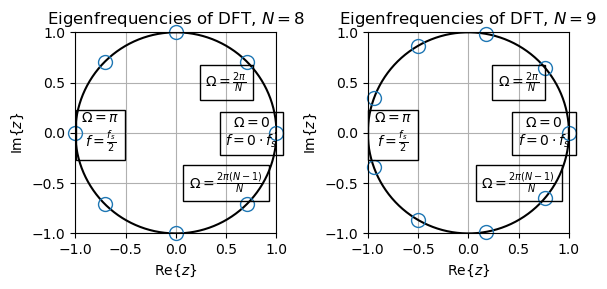

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
N = 8
t = np.arange(0, 2*np.pi, 1/100)
ax1.plot(np.cos(t), np.sin(t), color='black')
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_xticks(np.arange(-1, 1.5, 0.5))
ax1.set_yticks(np.arange(-1, 1.5, 0.5))
ax1.set_aspect(aspect='equal', adjustable='box')
ax1.set_title('Eigenfrequencies of DFT, ' + r'$N = %d$' % (N))
ax1.set_xlabel('$\mathrm{Re}\{z\}$')
ax1.set_ylabel('$\mathrm{Im}\{z\}$')
k = np.arange(0, N, 1)
ax1.plot(np.cos(2*np.pi/N*k), np.sin(2*np.pi/N*k), ls='none',
         marker='o', ms=10, mec='C0', mfc='none', clip_on=False)
ax1.text(x=0.75, y=0, s='$\Omega=0$\n$f=0\cdot f_s$', ha='center',
         va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=-0.75, y=0, s=r'$\Omega=\pi$' '\n' r'$f=\frac{f_s}{2}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=0.5, y=0.5, s=r'$\Omega=\frac{2\pi}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.text(x=0.5, y=-0.5, s=r'$\Omega=\frac{2\pi(N-1)}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax1.grid(True)
N = 9
ax2.plot(np.cos(t), np.sin(t), color='black')
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_xticks(np.arange(-1, 1.5, 0.5))
ax2.set_yticks(np.arange(-1, 1.5, 0.5))
ax2.set_aspect(aspect='equal', adjustable='box')
ax2.set_title('Eigenfrequencies of DFT, ' + r'$N = %d$' % (N))
k = np.arange(0, N, 1)
ax2.plot(np.cos(2*np.pi/N*k), np.sin(2*np.pi/N*k), ls='none',
         marker='o', ms=10, mec='C0', mfc='none', clip_on=False)
ax2.text(x=0.75, y=0, s='$\Omega=0$\n$f=0\cdot f_s$', ha='center',
         va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=-0.75, y=0, s=r'$\Omega=\pi$' '\n' r'$f=\frac{f_s}{2}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=0.5, y=0.5, s=r'$\Omega=\frac{2\pi}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.text(x=0.5, y=-0.5, s=r'$\Omega=\frac{2\pi(N-1)}{N}$',
         ha='center', va='center', bbox=dict(ec='black', fc='none'))
ax2.grid(True)
ax2.set_xlabel('$\mathrm{Re}\{z\}$')
ax2.set_ylabel('$\mathrm{Im}\{z\}$')
fig.tight_layout()
fig.savefig('graphics/DFT_Eigenfrequencies_N8_N9.pdf')

In [13]:
def create_DFT_for_interpol_plot(N):
    """
    Creates a DFT with length N
    Parameters
    -----------
    N : int, >0
        length of the DFT that will be created
    """
    k = np.arange(0, N, 1)
    x = 0.5+0.8*np.sin(np.pi/4*k)+0.4*np.sin(np.pi/2*k) + \
        1.5*np.sin(3*np.pi/4*k)+0.75/2*np.sin(np.pi*k-np.pi/2)
    return k, np.fft.fft(x)


def interpolate_DTFT(X, Omega_int):
    """
    Interpolates a DFT.
    Parameters
    -----------
    X : array like
        DFT that has to be interpolated
    Omega_int : array like
        Omega for the interpolated DTFT
    Returns
    ----------
    X_int : array like
        interpolated DTFT
    """
    N = X.size
    X_int = np.zeros(Omega_int.size, dtype=complex)
    for n in range(0, Omega_int.size):
        for mu in range(0, N):
            tmp = Omega_int[n]-2*np.pi/N*mu
            X_int[n] = X_int[n]+X[mu]*np.exp(-1j*tmp/2*(N-1))*diric(tmp, N)
    return X_int


def plot_interpolation_DTFT(N, ax, mode='mu', setTitle=False):
    mu, X = create_DFT_for_interpol_plot(N)
    Omega_int = np.arange(0, 2*np.pi, 1/128*np.pi)
    X_int = interpolate_DTFT(X=X, Omega_int=Omega_int)
    if mode == 'mu':
        ax.stem(mu, np.abs(X)/N, basefmt="none", markerfmt="none")
        ax.plot(mu, np.abs(X)/N, ls='none', marker='o',
                mec='C0', mfc='C0', ms=7, clip_on=False)
        ax.plot(N, np.abs(X[0])/N, ls='none', marker='o',
                mec='black', mfc='black', ms=7, clip_on=False)
        ax.set_xlim(0, N)
        ax.set_xticks(np.arange(0, N, np.ceil(N/10)))
        ax.plot(N*Omega_int/(2*np.pi), np.abs(X_int) /
                N, color='C1', clip_on=False)
        ax.set_xlabel('$\mu$')
    elif mode == 'pi':
        ax.stem(mu/N*2, np.abs(X)/N, basefmt="none", markerfmt='none')
        ax.plot(mu/N*2, np.abs(X)/N, ls='none', marker='o',
                mec='C0', mfc='C0', ms=7, clip_on=False)
        ax.plot(2, np.abs(X[0])/N, ls='none', marker='o',
                mec='black', mfc='black', ms=7, clip_on=False)
        ax.set_xlim(0, 2)
        ax.set_xticks(np.arange(0, 2.1, 0.5))
        ax.plot(Omega_int/(np.pi), np.abs(X_int)/N, color='C1', clip_on=False)
        ax.set_xlabel('$\Omega\enspace /\enspace \pi$')
    elif mode == 'fs':
        ax.stem(mu/N, np.abs(X)/N, basefmt="none", markerfmt='none')
        ax.plot(mu/N, np.abs(X)/N, ls='none', marker='o',
                mec='C0', mfc='C0', ms=7, clip_on=False)
        ax.plot(1, np.abs(X[0])/N, ls='none', marker='o',
                mec='black', mfc='black', ms=7, clip_on=False)
        ax.set_xlim(0, 1)
        ax.set_xticks(np.arange(0, 1.1, 0.25))
        ax.plot(Omega_int/(2*np.pi), np.abs(X_int) /
                N, color='C1', clip_on=False)
        ax.set_xlabel('$f\enspace /\enspace f_s$')
    else:
        print("Wrong mode, only \"mu\", \"pi\" and \"fs\" are accepted.")
    ax.set_ylabel('$|X[\mu]|,|X(\Omega)|$')
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.5))
    ax.grid(True)
    if setTitle is True:
        ax.set_title('$N=%d$' % (N))

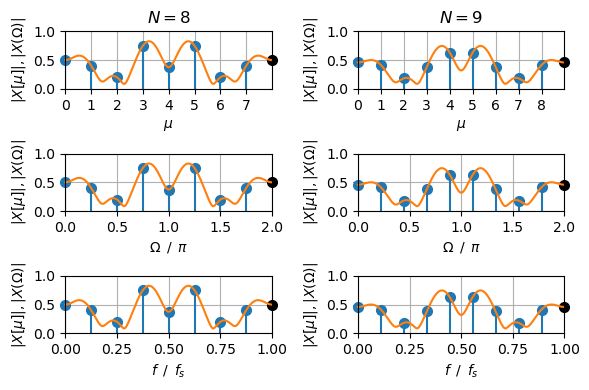

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(
    nrows=3, ncols=2, figsize=(6, 4))
plot_interpolation_DTFT(N=8, ax=ax1, mode='mu', setTitle=True)
plot_interpolation_DTFT(N=9, ax=ax2, mode='mu', setTitle=True)
plot_interpolation_DTFT(N=8, ax=ax3, mode='pi', setTitle=False)
plot_interpolation_DTFT(N=9, ax=ax4, mode='pi', setTitle=False)
plot_interpolation_DTFT(N=8, ax=ax5, mode='fs', setTitle=False)
plot_interpolation_DTFT(N=9, ax=ax6, mode='fs', setTitle=False)
fig.tight_layout()
fig.savefig('graphics/DTFT_Interpolation.pdf')

In [15]:
def plot_dtft_dft_rectangular_window_spectrum_asym(ax, N=1, ylim=6, mode='lin'):
    """IN LOG MODE THIS FUNCTION SHOULD ONLY BE USED WITH N BETWEEN 1 AND 100

    Plots DTFT and DFT magnitudes of a rectangular window of length N, 0 <= Omega <= 2pi
    Parameters
    ----------
    ax : ax object
        ax object where the plot shall be created
    N : int, >0
        length of rectangular window
    ylim : float, optional
        positiv limit of y-axis
    mode: string, optional
        'lin': linear spectrum
        'log': logarithmic spectrum
    """
    Omega = np.arange(1/128*np.pi, 2*np.pi, 1/128*np.pi)
    X_dtft = np.exp(-1j*Omega/2*(N-1))*np.sin(N*Omega/2)/np.sin(Omega/2)
    X_dft = np.zeros(N)
    X_dft[0] = N
    if mode == 'lin':
        ax.plot(np.append(np.array([0]), Omega)/np.pi, np.append(
            np.array([N]), np.abs(X_dtft)), color='C1', label='DTFT', clip_on=False)
        ax.plot(np.arange(0, N, 1)/N*2, np.abs(X_dft), ls='none',
                marker='o', mec='C0', mfc='C0', ms=9, label='DFT', clip_on=False)
        ax.set_ylabel('$|A|$')
        ax.set_yticks(np.arange(0, N+2, np.ceil(N/10)))
        ax.set_ylim(0, N+1)
        ax.legend()
    elif mode == 'log':
        ax.plot(np.append(np.array([0]), Omega)/np.pi, 20*np.log10(
            np.append(np.array([N]), np.abs(X_dtft))), color='black')
        ax.set_ylabel('$A\enspace/\enspace\mathrm{dB}$')
        y = 20*np.log10(N)
        if y < 20:
            y = 20
        else:
            y = int(y/5)*5+5
        ax.set_ylim(-20, y)
        ax.set_yticks(np.arange(-20, y+5, 5))
        ax.set_xlim(0, 2)
    ax.set_xticks(np.arange(0, 2.1, 0.5))
    ax.set_xlim(0, 2)
    ax.set_xlabel('$\Omega\enspace/\enspace\pi$')
    ax.set_title(r'$N=%d$' % (N))
    ax.grid(True)

In [16]:
def plot_dtft_dft_rectangular_window_spectrum_sym(ax, N=1, ylim=6, mode='lin'):
    """IN LOG MODE THIS FUNCTION SHOULD ONLY BE USED WITH N BETWEEN 1 AND 100

    Plots DTFT and DFT magnitudes of a rectangular window of length N, -pi <= Omega <= pi
    Parameters
    ----------
    ax : ax object
        ax object where the plot shall be created
    N : int, >0
        length of rectangular window
    ylim : float, optional
        positiv limit of y-axis
    mode: string, optional
        'lin': linear spectrum
        'log': logarithmic spectrum
    """
    Omega1 = np.arange(-np.pi, 0, 1/128*np.pi)
    Omega2 = np.arange(1/128*np.pi, np.pi, 1/128*np.pi)
    Omega = np.append(Omega1, np.array([0]))
    Omega = np.append(Omega, Omega2)
    X_dtft1 = np.exp(-1j*Omega1/2*(N-1))*np.sin(N*Omega1/2)/np.sin(Omega1/2)
    X_dtft2 = np.exp(-1j*Omega2/2*(N-1))*np.sin(N*Omega2/2)/np.sin(Omega2/2)
    X_dtft1 = np.append(X_dtft1, np.array([N]))
    X_dtft1 = np.append(X_dtft1, X_dtft2)
    X_dft = np.zeros(N)
    X_dft[int(N/2)] = N
    if mode == 'lin':
        ax.plot(Omega/np.pi, np.abs(X_dtft1),
                color='C1', label='DTFT', clip_on=False)
        ax.plot((np.arange(0, N, 1)-int(N/2))/N*2, np.abs(X_dft), ls='none',
                marker='o', mec='C0', mfc='C0', ms=9, label='DFT', clip_on=False)
        ax.stem((np.arange(0, N, 1)-int(N/2))/N*2, np.abs(X_dft),
                basefmt='C0:', linefmt='C0', markerfmt='C0o')
        ax.set_ylabel('$|A|$')
        ax.set_yticks(np.arange(0, N+2, np.ceil(N/10)))
        ax.set_ylim(0, N+1)
        ax.legend()
    elif mode == 'log':
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(X_dtft1)), color='black')
        ax.set_ylabel('$A\enspace/\enspace\mathrm{dB}$')
        y = 20*np.log10(N)
        if y < 20:
            y = 20
        else:
            y = int(y/5)*5+5
        ax.set_ylim(-20, y)
        ax.set_yticks(np.arange(-20, y+5, 5))
        ax.set_xlim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.set_xlim(-1, 1)
    ax.set_xlabel('$\Omega\enspace/\enspace\pi$')
    ax.set_title(r'$N=%d$' % (N))
    ax.grid(True)

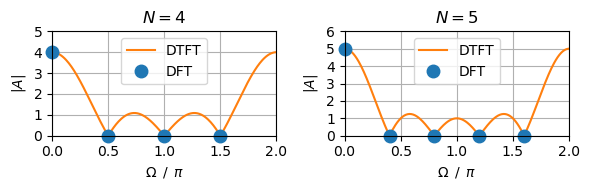

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
plot_dtft_dft_rectangular_window_spectrum_asym(N=4, ax=ax1)
plot_dtft_dft_rectangular_window_spectrum_asym(N=5, ax=ax2)
fig.tight_layout()
fig.savefig('graphics/RectWindow_DTFT_DFT_lin_asym.pdf')

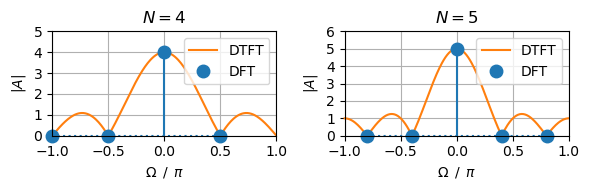

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
plot_dtft_dft_rectangular_window_spectrum_sym(N=4, ax=ax1)
plot_dtft_dft_rectangular_window_spectrum_sym(N=5, ax=ax2)
fig.tight_layout()
fig.savefig('graphics/RectWindow_DTFT_DFT_lin_sym.pdf')

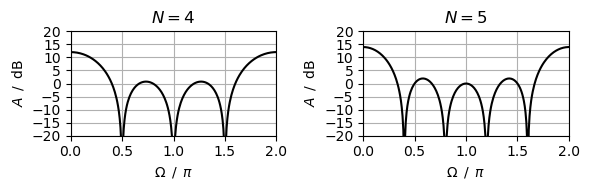

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
plot_dtft_dft_rectangular_window_spectrum_asym(N=4, ax=ax1, mode='log')
plot_dtft_dft_rectangular_window_spectrum_asym(N=5, ax=ax2, mode='log')
fig.tight_layout()
fig.savefig('graphics/RectWindow_DTFT_DFT_log_asym.pdf')

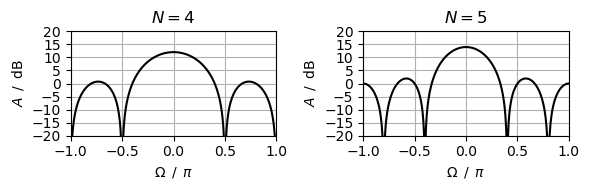

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 2))
plot_dtft_dft_rectangular_window_spectrum_sym(N=4, ax=ax1, mode='log')
plot_dtft_dft_rectangular_window_spectrum_sym(N=5, ax=ax2, mode='log')
fig.tight_layout()
fig.savefig('graphics/RectWindow_DTFT_DFT_log_sym.pdf')

The following code block plots the time domain and magnitude spectrum for $x_1[k]\cdot w_{\mathrm{Rect}}[k]$ and $x_2[k]\cdot w_{\mathrm{Rect}}[k]$ with $x_1[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot 2k}$, $x_2[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot\left(2-\frac{1}{2}\right)k}$, $k\in\{0,1,\dots,N-1\}$, $\mu\in\{0,1,\dots,N-1\}$ and $N=8$.

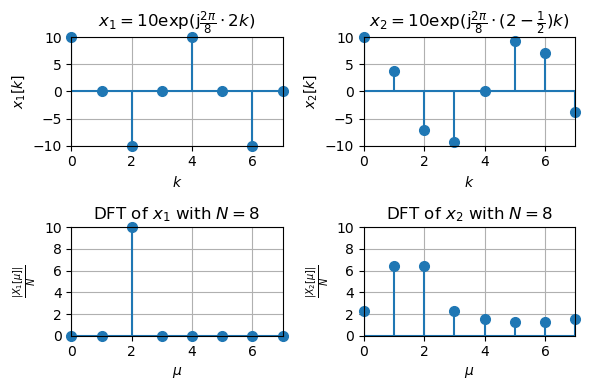

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(6, 4))
k = np.arange(0, 8)
A = 10
N = 8
x1 = A*np.exp(1j*np.pi*k/2)
x2 = A*np.exp(1j*np.pi/4*(2-1/2)*k)
X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
ax1.stem(k, np.real(x1), basefmt='C0', markerfmt='none')
ax1.plot(k, np.real(x1), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax1.set_title(
    r'$x_1=%d \mathrm{exp}({\mathrm{j}\frac{2\pi}{8}\cdot 2k})$' % (A))
ax1.set_ylabel('$x_1[k]$')
ax1.set_xlabel('$k$')
ax1.set_xticks(np.arange(0, 8, 2))
ax1.set_yticks(np.arange(-10, 11, 5))
ax1.set_xlim(0, N-1)
ax1.set_ylim(-10, 10)
ax1.grid(True)
ax2.stem(k, np.real(x2), basefmt='C0', markerfmt='none')
ax2.plot(k, np.real(x2), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax2.set_title(
    r'$x_2=%d \mathrm{exp}({\mathrm{j}\frac{2\pi}{8}\cdot (2-\frac{1}{2})k})$' % (A))
ax2.set_ylabel('$x_2[k]$')
ax2.set_xlabel('$k$')
ax2.set_xticks(np.arange(0, 8, 2))
ax2.set_yticks(np.arange(-10, 11, 5))
ax2.set_xlim(0, N-1)
ax2.set_ylim(-10, 10)
ax2.grid(True)
ax3.stem(k, np.abs(X1)/N, basefmt='C0', markerfmt='none')
ax3.plot(k, np.abs(X1)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax3.set_title('DFT of $x_1$ with $N=8$')
ax3.set_ylabel(r'$\frac{|X_1[\mu]|}{N}$')
ax3.set_xlabel('$\mu$')
ax3.set_xticks(np.arange(0, 8, 2))
ax3.set_yticks(np.arange(0, 11, 2))
ax3.set_xlim(0, N-1)
ax3.set_ylim(0, 10)
ax3.grid(True)
ax4.stem(k, np.abs(X2)/N, basefmt='C0', markerfmt='none')
ax4.plot(k, np.abs(X2)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax4.set_title('DFT of $x_2$ with $N=8$')
ax4.set_ylabel(r'$\frac{|X_2[\mu]|}{N}$')
ax4.set_xlabel('$\mu$')
ax4.set_xticks(np.arange(0, 8, 2))
ax4.set_yticks(np.arange(0, 11, 2))
ax4.set_xlim(0, N-1)
ax4.set_ylim(0, 10)
ax4.grid(True)
fig.tight_layout()
fig.savefig('graphics/DFTbestworstcase_RectWin.pdf')

In [22]:
def hann_window_definitions(ax, N=8, legend_flag=True):
    """
    FOR N>100 YOU SHOULD DEFINE A NEW UPPER BOUND FOR XTICKS
    Plots the Hann window according to three different definitions:
        1. periodic Hann window
        2. symmetric Hann winow
        3. Hann window following Möser (TBD: find a further reference that can be cited)
    Parameters
    ----------
    ax: Axes 
    N : int, optional
        length of Hann window
    """
    ax.set_title('Hann window definitions, $N=%d$' % (N))
    ax.set_ylabel('$w[k]$')
    ax.set_xlabel('$k$')
    k = np.arange(0, N)
    # for Hann window see more in https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hann.html#scipy.signal.windows.hann, last access 22.11.2021
    periodic = windows.hann(M=N, sym=False)
    symmetric = windows.windows.hann(M=N, sym=True)
    moeser = 0.5-0.5*np.cos(2*np.pi/N*(k+1/2))
    if N <= 20:
        ax.plot(k, periodic, color='C3', ls='-.', marker='o', mec='C3',
                mfc='none', ms=8, label='Hann Window, periodic', clip_on=False)
        ax.plot(k, symmetric, color='black', ls='-', marker='o', mec='black',
                mfc='none', ms=8, label='Hann Window, symmetric', clip_on=False)
        ax.plot(k, moeser, color='C0', ls='--', marker='o', mec='C0',
                mfc='none', ms=8, label='Möser, Ifeachor', clip_on=False)
        ax.set_yticks(np.arange(0, 1.5, 0.2))
        ax.set_xticks(np.arange(0, N, 2))
    else:
        ax.plot(k, periodic, color='C3', ls='-.',
                label='Hann Window, periodic')
        ax.plot(k, symmetric, color='black', ls='-',
                label='Hann Window, symmetric')
        ax.plot(k, moeser, color='C0', ls='--', label='Möser, Ifeachor')
        ax.set_yticks(np.arange(0, 1.5, 0.2))
        ax.set_xticks(np.arange(0, N, 10))
    if legend_flag:
        ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 1.4)
    ax.set_xlim(0, N-1)

/var/folders/v3/d1rkkg8x113cdy05ym6vxy300000gn/T/ipykernel_30707/2549429115.py:20: DeprecationWarning: Please use `hann` from the `scipy.signal.windows` namespace, the `scipy.signal.windows.windows` namespace is deprecated.
  symmetric = windows.windows.hann(M=N, sym=True)


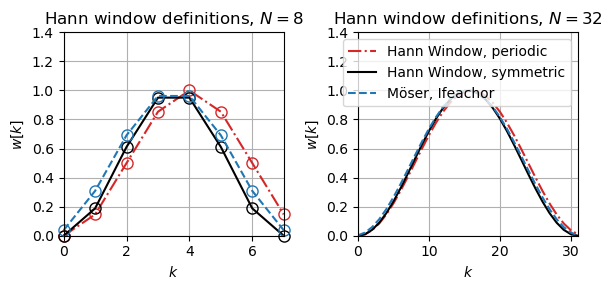

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(6, 3))
hann_window_definitions(ax1, N=8, legend_flag=False)
hann_window_definitions(ax2, N=32, legend_flag=True)
fig.tight_layout()
fig.savefig('graphics/HannDefinitionen.pdf')

In [24]:
def plot_hann_rect_window(N, ax, mode='normal'):
    """
    This functions plots the Hann Window's magnitude spectrum for different scalings and its components.
    Parameters
    ----------
    N : int
        length of window
    ax : Axes
    mode: string, optinal
        'normal' : linear scaling with 4 plots: W_Rect(Omega) (=R1), -1/2e^{j*pi/N}*W_Rect(Omega-2*pi/N) (=R2),
                -1/2e^{j*pi/N}*W_Rect(Omega+2*pi/N) (=R3), Hann-Window = R1+R2+R3, all divided by exp(-1j*Omega*(N-1)/2)
        'lin' : linear scaling, but magnitude is normalized; R1 and Hann-Window
        'log' : log scaling; R1 and Hann-Window
        'normalReIm' : normal scaling, real and imaginary part of Hann Window and rectangle window
        'normalRe' : normal scaling, imaginary part of R1, R2, R3 and Hann Window
        'normalIm' : normal scaling, imaginary part of R1, R2, R3 and Hann Window
    """
    Omega = np.arange(-np.pi, np.pi, np.pi/1000)
    R1 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega, N)*N
    R2 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega-2*np.pi/N, N)*N/2
    R3 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega+2*np.pi/N, N)*N/2
    W = R1+R2+R3
    if mode == 'normal':
        ax.plot(Omega/np.pi, np.real(R1*np.exp(1j*Omega*(N-1)/2)), color='black',
                label='rectangular window $R_1$')
        ax.plot(Omega/np.pi, np.real(R2*np.exp(1j*Omega*(N-1)/2)),
                color='C0', ls='--', label='$R_2$')
        ax.plot(Omega/np.pi, np.real(R3*np.exp(1j*Omega*(N-1)/2)),
                color='C6', label='$R_3$')
        ax.plot(Omega/np.pi, np.real(W*np.exp(1j*Omega*(N-1)/2)), color='C3',
                ls='-.', label='Hann window $R_1+R_2+R_3$')
        mmin = min(np.amin(np.real(R1*np.exp(1j*Omega*(N-1)/2))), np.amin(np.real(R2*np.exp(1j*Omega*(N-1)/2))),
                   np.amin(np.real(R3*np.exp(1j*Omega*(N-1)/2))), np.amin(np.real(W*np.exp(1j*Omega*(N-1)/2))))
        mmin = mmin - mmin % 1
        mmax = N
        ax.set_yticks(np.append(np.arange(0, mmax+0.1, int(N/4)),
                      np.arange(0, mmin-0.1, -int(N/4))))
        ax.set_ylim(mmin, N)
        ax.set_ylabel('A')
        ax.legend()
    if mode == 'normalReIm':
        ax.plot(Omega/np.pi, np.real(W), color='C0',
                label=r'$\mathrm{Re}\left\{R_1+R_2+R_3\right\}$')
        ax.plot(Omega/np.pi, np.imag(W), color='C2',
                label=r'$\mathrm{Im}\left\{R_1+R_2+R_3\right\}$')
        ax.plot(Omega/np.pi, np.real(R1), ls='--', color='C1',
                label=r'$\mathrm{Re}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.imag(R1), ls='--', color='black',
                label=r'$\mathrm{Im}\left\{R_1\right\}$')
        ax.set_ylabel('A')
        ax.legend()
    elif mode == 'normalRe':
        ax.plot(Omega/np.pi, np.real(R1), color='black',
                label=r'$\mathrm{Re}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.real(R2), color='C0', ls='--',
                label=r'$\mathrm{Re}\left\{R_2\right\}$')
        ax.plot(Omega/np.pi, np.real(R3), color='C4',
                label=r'$\mathrm{Re}\left\{R_3\right\}$')
        ax.plot(Omega/np.pi, np.real(W), color='C3',
                ls='-.', label=r'$\mathrm{Re}\left\{R_1+R_2+R_3\right\}$')
        ax.set_ylabel(r'$\mathrm{Re}\left\{A\right\}$')
        ax.legend()
    elif mode == 'normalIm':
        ax.plot(Omega/np.pi, np.imag(R1), color='black',
                label=r'$\mathrm{Im}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.imag(R2), color='C0', ls='--',
                label=r'$\mathrm{Im}\left\{R_2\right\}$')
        ax.plot(Omega/np.pi, np.imag(R3), color='C4',
                label=r'$\mathrm{Im}\left\{R_3\right\}$')
        ax.plot(Omega/np.pi, np.imag(W), color='C3',
                ls='-.', label=r'$\mathrm{Im}\left\{R_1+R_2+R_3\right\}$')
        ax.set_ylabel(r'$\mathrm{Im}\left\{A\right\}$')
        ax.legend()
    elif mode == 'lin':
        ax.plot(Omega/np.pi, np.abs(R1)/N, color='black',
                label='rectangular window')
        #ax.plot(omega/np.pi,np.real(R2),color ='blue', ls='--',label = '$R_2$')
        # ax.plot(omega/np.pi,np.real(R3),color='aqua',label='$R_3$')
        ax.plot(Omega/np.pi, np.abs(W)/N,
                color='C3', ls='-.', label='Hann window')
        ax.legend()
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_ylabel(r'$\frac{|A|}{N}$')
    elif mode == 'log':
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(R1)/N),
                color='black', label='rectangular window')
        #ax.plot(omega/np.pi,np.real(R2),color ='blue', ls='--',label = '$R_2$')
        # ax.plot(omega/np.pi,np.real(R3),color='aqua',label='$R_3$')
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(W)/N),
                color='C3', ls='-.', label='Hann window')
        ax.legend()
        ax.set_ylim(-60, 0)
        ax.set_yticks(
            np.append(np.arange(-60, -6.1, 6), np.arange(-6, 0.1, 3)))
        ax.set_ylabel(r'$20*\log_{10}\left(\frac{|A|}{N}\right)$')
    if (mode == 'normal' or mode == 'lin') and N <= 25:
        if N % 2 == 0:
            Omega = np.arange(-N//2-1, N//2)*2*np.pi/N
        else:
            Omega = np.arange(-N//2, N//2+1)*2*np.pi/N
        Omega[N//2+1] = 10**(-16)
        ax.plot(Omega[1:N//2]/np.pi, np.zeros(len(Omega[1:N//2])),
                ls='none', marker='o', color='C3', ms=9, clip_on=False)
        ax.plot([Omega[N//2]/np.pi, Omega[N//2+2]/np.pi], np.zeros(2),
                ls='none', marker='o', color='black', ms=9, clip_on=False)
        if mode == 'normal':
            ax.plot(0, N, ls='none', marker='o',
                    color='C3', ms=9, clip_on=False)
        else:
            ax.plot(0, 1, ls='none', marker='o',
                    color='C3', ms=9, clip_on=False)
        ax.plot(Omega[N//2+3:]/np.pi, np.zeros(len(Omega[N//2+3:])),
                ls='none', marker='o', color='C3', ms=9, clip_on=False)
    ax.set_xlim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.1, 0.2))
    ax.set_title('Hann window, $N=%d$' % (N))
    ax.grid(True)
    ax.set_xlabel('$\Omega\enspace/\enspace\pi$')

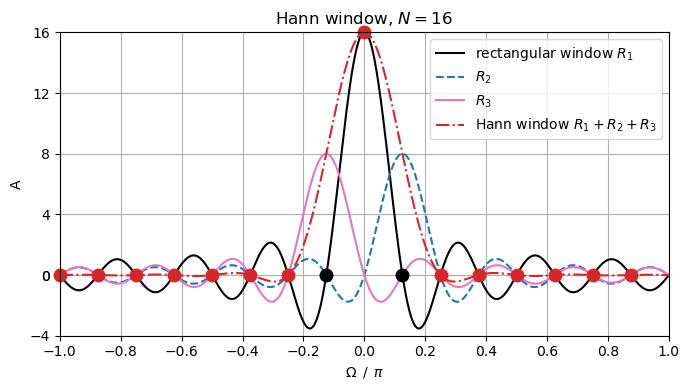

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(7,4))
plot_hann_rect_window(N=16, ax=ax, mode='normal')
fig.tight_layout()
fig.savefig('graphics/Hann_from_RectWindow.pdf')

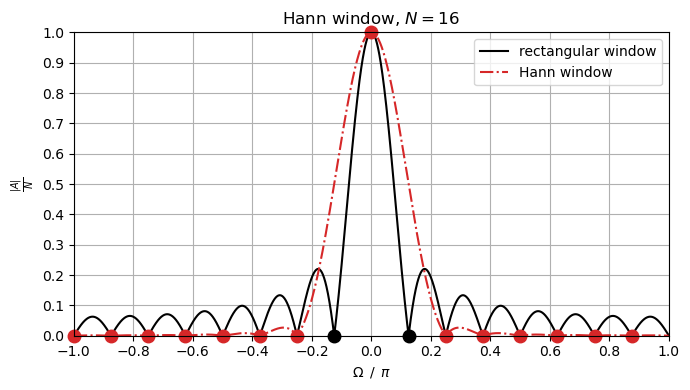

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plot_hann_rect_window(N=16, ax=ax, mode='lin')
fig.tight_layout()
fig.savefig('graphics/DTFTHannWin_lin.pdf')

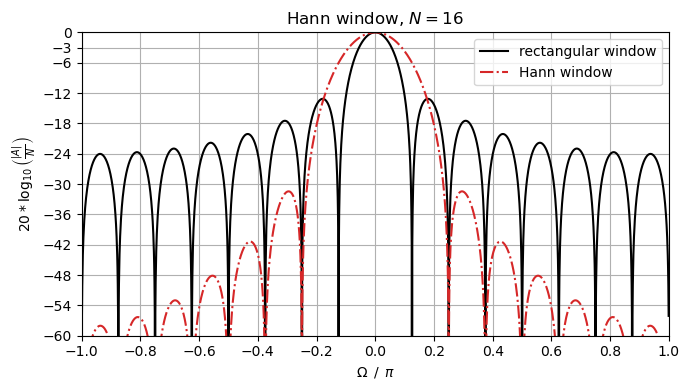

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plot_hann_rect_window(N=16, ax=ax, mode='log')
fig.tight_layout()
fig.savefig('graphics/DTFTHannWin_log.pdf')

The following code block plots the time domain and magnitude spectrum for $x_1[k]\cdot w_{\mathrm{Hann}}[k]$ and $x_2[k]\cdot w_{\mathrm{Hann}}[k]$ with $x_1[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot 2k}$, $x_2[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot\left(2-\frac{1}{2}\right)k}$, $k\in\{0,1,\dots,N-1\}$, $\mu\in\{0,1,\dots,N-1\}$ and $N=8$.

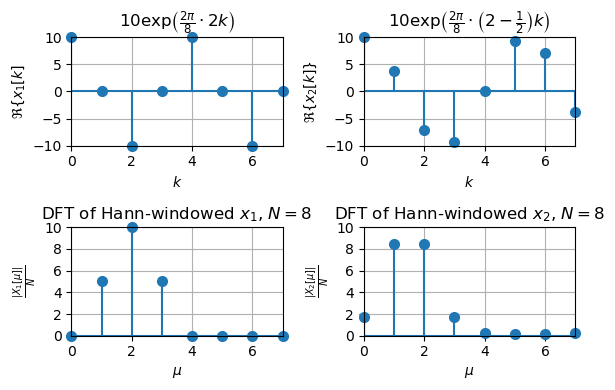

In [28]:
N = 8
k = np.arange(0, N, 1)
x1 = 10*np.exp(1j*np.pi/2*k)
x2 = 10*np.exp(1j*np.pi/4*(2-1/2)*k)
whann = 1-np.cos(2*np.pi/N*(k+1/2))
X1 = np.fft.fft(x1*whann)
X2 = np.fft.fft(x2*whann)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(6, 4))
ax1.stem(k, np.real(x1), basefmt='C0', markerfmt='none')
ax1.plot(k, np.real(x1), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax1.set_xticks(np.arange(0, N, 2))
ax1.set_yticks(np.arange(-10, 11, 5))
ax1.set_xlim(0, N-1)
ax1.set_ylim(-10, 10)
ax1.grid(True)
ax1.set_title(r'$10\mathrm{exp}\left(\frac{2\pi}{8}\cdot 2k\right)$')
ax1.set_xlabel('$k$')
ax1.set_ylabel('$\Re\{x_1[k]}$')
ax2.stem(k, np.real(x2), basefmt='C0', markerfmt='none')
ax2.plot(k, np.real(x2), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax2.set_xticks(np.arange(0, N, 2))
ax2.set_yticks(np.arange(-10, 11, 5))
ax2.set_xlim(0, N-1)
ax2.set_ylim(-10, 10)
ax2.grid(True)
ax2.set_title(
    r'$10\mathrm{exp}\left(\frac{2\pi}{8}\cdot \left(2-\frac{1}{2}\right)k\right)$')
ax2.set_xlabel('$k$')
ax2.set_ylabel('$\Re\{x_2[k]\}$')
ax3.stem(k, np.abs(X1)/N, basefmt='C0', markerfmt='none')
ax3.plot(k, np.abs(X1)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax3.set_xticks(np.arange(0, N, 2))
ax3.set_yticks(np.arange(0, 11, 2))
ax3.set_xlim(0, N-1)
ax3.set_ylim(0, 10)
ax3.grid(True)
ax3.set_title('DFT of Hann-windowed $x_1$, $N=%d$' % (N))
ax3.set_xlabel('$\mu$')
ax3.set_ylabel(r'$\frac{|X_1[\mu]|}{N}$')
ax4.stem(k, np.abs(X2)/N, basefmt='C0', markerfmt='none')
ax4.plot(k, np.abs(X2)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax4.set_xticks(np.arange(0, N, 2))
ax4.set_yticks(np.arange(0, 11, 2))
ax4.set_xlim(0, N-1)
ax4.set_ylim(0, 10)
ax4.grid(True)
ax4.set_title('DFT of Hann-windowed $x_2$, $N=%d$' % (N))
ax4.set_xlabel('$\mu$')
ax4.set_ylabel(r'$\frac{|X_2[\mu]|}{N}$')
fig.tight_layout()
fig.savefig('graphics/DFTbestworstcase_HannWin.pdf')

In [29]:
def plot_hamming_rect_window(N, ax, mode='normal', beta=21/25):
    """
    This functions plots the Hamming Window's magnitude spectrum for different scalings and its components.
    Parameters
    ----------
    N : int
        length of window
    ax : Axes
    mode : string, optinal
        'normal' :  linear scaling with 4 plots: W_Rect(Omega) (=R1), -1/2e^{j*pi/N}*W_Rect(Omega-2*pi/N) (=R2)*beta,
                    -1/2e^{j*pi/N}*W_Rect(Omega+2*pi/N) (=R3)*beta, Hamming-Window = R1+R2+R3, divided by exp(-1j*Omega*(N-1)/2)
        'lin' :      linear scaling, but magnitude is normalized; R1 and Hamming-Window
        'log' :      log scaling; R1 and Hamming-Window
        'normalReIm' : normal scaling, real and imaginary part of Hamming Window and rectangle window
        'normalRe' : normal scaling, imaginary part of R1, R2, R3 and Hamming Window
        'normalIm' : normal scaling, imaginary part of R1, R2, R3 and Hamming Window
    beta : float, optinal 
    """
    Omega = np.arange(-np.pi, np.pi, np.pi/1000)
    R1 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega, N)*N
    R2 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega-2*np.pi/N, N)*N*beta/2
    R3 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega+2*np.pi/N, N)*N*beta/2
    W = R1+R2+R3
    if mode == 'normal':
        ax.plot(Omega/np.pi, np.real(R1*np.exp(1j*Omega*(N-1)/2)), color='black',
                label='rectangular window $R_1$')
        ax.plot(Omega/np.pi, np.real(R2*np.exp(1j*Omega*(N-1)/2)),
                color='C0', ls='--', label='$R_2$')
        ax.plot(Omega/np.pi, np.real(R3*np.exp(1j*Omega*(N-1)/2)),
                color='C6', label='$R_3$')
        ax.plot(Omega/np.pi, np.real(W*np.exp(1j*Omega*(N-1)/2)), color='C3',
                ls='-.', label='Hamming window $R_1+R_2+R_3$')
        mmin = min(np.amin(np.real(R1*np.exp(1j*Omega*(N-1)/2))), np.amin(np.real(R2*np.exp(1j*Omega*(N-1)/2))),
                   np.amin(np.real(R3*np.exp(1j*Omega*(N-1)/2))), np.amin(np.real(W*np.exp(1j*Omega*(N-1)/2))))
        mmin = mmin - mmin % 1
        mmax = N
        ax.set_yticks(np.append(np.arange(0, mmax+0.1, int(N/4)),
                      np.arange(0, mmin-0.1, -int(N/4))))
        ax.set_ylim(mmin, N)
        ax.set_ylabel('A')
        ax.legend()
    if mode == 'normalReIm':
        ax.plot(Omega/np.pi, np.real(W), color='C0',
                label=r'$\mathrm{Re}\left\{R_1+R_2+R_3\right\}$')
        ax.plot(Omega/np.pi, np.imag(W), color='C2',
                label=r'$\mathrm{Im}\left\{R_1+R_2+R_3\right\}$')
        ax.plot(Omega/np.pi, np.real(R1), ls='--', color='C1',
                label=r'$\mathrm{Re}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.imag(R1), ls='--', color='black',
                label=r'$\mathrm{Im}\left\{R_1\right\}$')
        ax.set_ylabel('A')
        ax.legend()
    elif mode == 'normalRe':
        ax.plot(Omega/np.pi, np.real(R1), color='black',
                label=r'$\mathrm{Re}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.real(R2), color='C0', ls='--',
                label=r'$\mathrm{Re}\left\{R_2\right\}$')
        ax.plot(Omega/np.pi, np.real(R3), color='C4',
                label=r'$\mathrm{Re}\left\{R_3\right\}$')
        ax.plot(Omega/np.pi, np.real(W), color='C3',
                ls='-.', label=r'$\mathrm{Re}\left\{R_1+R_2+R_3\right\}$')
        ax.set_ylabel(r'$\mathrm{Re}\left\{A\right\}$')
        ax.legend()
    elif mode == 'normalIm':
        ax.plot(Omega/np.pi, np.imag(R1), color='black',
                label=r'$\mathrm{Im}\left\{R_1\right\}$')
        ax.plot(Omega/np.pi, np.imag(R2), color='C0', ls='--',
                label=r'$\mathrm{Im}\left\{R_2\right\}$')
        ax.plot(Omega/np.pi, np.imag(R3), color='C4',
                label=r'$\mathrm{Im}\left\{R_3\right\}$')
        ax.plot(Omega/np.pi, np.imag(W), color='C3',
                ls='-.', label=r'$\mathrm{Im}\left\{R_1+R_2+R_3\right\}$')
        ax.set_ylabel(r'$\mathrm{Im}\left\{A\right\}$')
        ax.legend()
    elif mode == 'lin':
        ax.plot(Omega/np.pi, np.abs(R1)/N, color='black',
                label='rectangular window')
        #ax.plot(omega/np.pi,np.real(R2),color ='blue', ls='--',label = '$R_2$')
        # ax.plot(omega/np.pi,np.real(R3),color='aqua',label='$R_3$')
        ax.plot(Omega/np.pi, np.abs(W)/N,
                color='C3', ls='-.', label='Hamming window')
        ax.legend()
        ax.set_ylim(0, 1)
        ax.set_yticks(np.arange(0, 1.1, 0.1))
        ax.set_ylabel(r'$\frac{|A|}{N}$')
    elif mode == 'log':
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(R1)/N),
                color='black', label='rectangular window')
        #ax.plot(omega/np.pi,np.real(R2),color ='blue', ls='--',label = '$R_2$')
        # ax.plot(omega/np.pi,np.real(R3),color='aqua',label='$R_3$')
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(W)/N),
                color='C3', ls='-.', label='Hamming window')
        ax.legend()
        ax.set_ylim(-60, 0)
        ax.set_yticks(
            np.append(np.arange(-60, -6.1, 6), np.arange(-6, 0.1, 3)))
        ax.set_ylabel(r'$20*\log_{10}\left(\frac{|A|}{N}\right)$')
    if (mode == 'normal' or mode == 'lin') and N <= 25:
        if N % 2 == 0:
            Omega = np.arange(-N//2-1, N//2)*2*np.pi/N
        else:
            Omega = np.arange(-N//2, N//2+1)*2*np.pi/N
        Omega[N//2+1] = 10**(-16)
        ax.plot(Omega[1:N//2]/np.pi, np.zeros(len(Omega[1:N//2])),
                ls='none', marker='o', mec='C3', mfc='C3', ms=9, clip_on=False)
        ax.plot([Omega[N//2]/np.pi, Omega[N//2+2]/np.pi], np.zeros(2),
                ls='none', marker='o', mec='black', mfc='black', ms=9, clip_on=False)
        if mode == 'normal':
            ax.plot(0, N, ls='none', marker='o', mfc='C3',
                    mec='C3', ms=9, clip_on=False)
        else:
            ax.plot(0, 1, ls='none', marker='o', mec='C3',
                    mfc='C3', ms=9, clip_on=False)
        ax.plot(Omega[N//2+3:]/np.pi, np.zeros(len(Omega[N//2+3:])),
                ls='none', marker='o', mec='C3', mfc='C3', ms=9, clip_on=False)
        ax.plot(np.array([-5/N, +5/N]), np.zeros(2), ls='none',
                marker='o', mec='C3', mfc='C3', ms=9, clip_on=False)
    ax.set_xlim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.1, 0.2))
    ax.set_title('Hamming window, $N=%d$' % (N))
    ax.grid(True)
    ax.set_xlabel('$\Omega\enspace/\enspace\pi$')

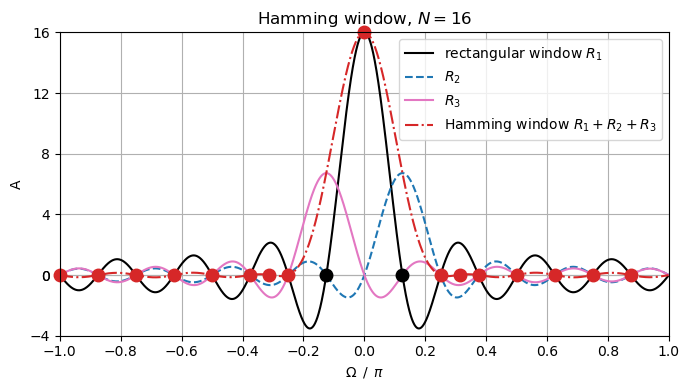

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
plot_hamming_rect_window(N=16, ax=ax, mode='normal')
fig.tight_layout()
fig.savefig('graphics/Hamming_from_RectWindow.pdf')

In [31]:
def plot_hann_hamming_rect_window(N, ax, rect=True, hamming=True, hann=True):
    """
    This function plots the rectangular window's, the Hann window's and the Hamming window's spectra with 
    logarithmic scaling in the same axes.

    N : int
        length of window
    ax : Axes
    rect : bool, optional
            if True, the rectangle window spectrum will be plotted, if false, not
    hann : bool, optional
            analog to rect, but for Hann window
    hamming : bool, optional
            analog to rect, but for Hamming window     
    """
    beta = 21/25
    Omega = np.arange(-np.pi, np.pi, np.pi/1000)
    R1 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega, N)*N
    R2 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega-2*np.pi/N, N)*N/2
    R3 = np.exp(-1j*Omega*(N-1)/2)*diric(Omega+2*np.pi/N, N)*N/2
    WHann = R1+R2+R3
    WHamming = R1+beta*R2+beta*R3
    s = []
    if rect == False and hamming == False and hann == False:
        print("You should print at least one spectra ;)")
        return
    if rect == True:
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(R1/N)),
                color='black', label='rectangular window')
        s += ["Rectangular"]
    if hann == True:
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(WHann/N)),
                ls='--', color='C0', label='Hann window')
        s += ["Hann"]
    if hamming == True:
        ax.plot(Omega/np.pi, 20*np.log10(np.abs(WHamming/N)),
                color='C3', label='Hamming window')
        s += ["Hamming"]
    ax.set_xlim(-1, 1)
    ax.set_xticks(np.arange(-1, 1.1, 0.2))
    ax.set_ylim(-60, 0)
    ax.set_yticks(np.append(np.arange(-60, -6.1, 6), np.arange(-6, 0.1, 3)))
    ax.grid(True)
    ax.set_ylabel(r'$20\cdot\log_{10}\left(\frac{|A|}{N}\right)$ / dB')
    ax.set_xlabel('$\Omega\enspace/\enspace\pi$')
    string = ""
    for i in range(0, len(s)):
        if i == len(s)-1 and len(s) > 1:
            string += "and "+s[i]+" window, $N=%d$"
        elif i == len(s)-1 and len(s) == 1:
            string = s[i]+" window, $N=%d$"
        elif i == 0 and len(s) == 2:
            string += s[i]+" "
        else:
            string += s[i] + ", "
    ax.set_title(string % (N))
    ax.legend()

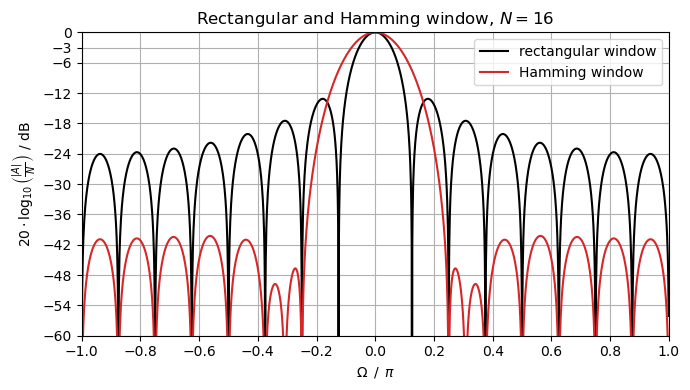

In [32]:
fig, ax = plt.subplots(1, figsize=(7, 4))
plot_hann_hamming_rect_window(16, ax, rect=True, hamming=True, hann=False)
fig.tight_layout()
fig.savefig('graphics/DTFTHammingWin_log.pdf')

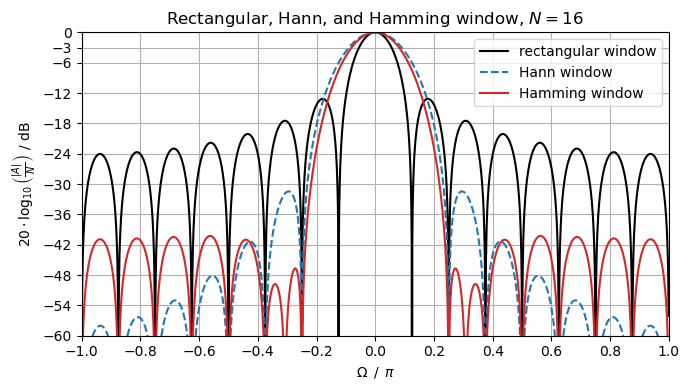

In [33]:
fig, ax = plt.subplots(1, figsize=(7, 4))
plot_hann_hamming_rect_window(16, ax, rect=True, hamming=True, hann=True)
fig.tight_layout()
fig.savefig('graphics/DTFTRectHanningHammingWin_log.pdf')

The following code block plots the time domain and magnitude spectrum for $x_1[k]\cdot w_{\mathrm{Hamming}}[k]$ and $x_2[k]\cdot w_{\mathrm{Hamming}}[k]$ with $x_1[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot 2k}$, $x_2[k]=10\mathrm{e}^{\mathrm{j}\frac{2\pi}{8}\cdot\left(2-\frac{1}{2}\right)k}$, $k\in\{0,1,\dots,N-1\}$, $\mu\in\{0,1,\dots,N-1\}$, $N=8$ and $\beta=\frac{21}{25}$.

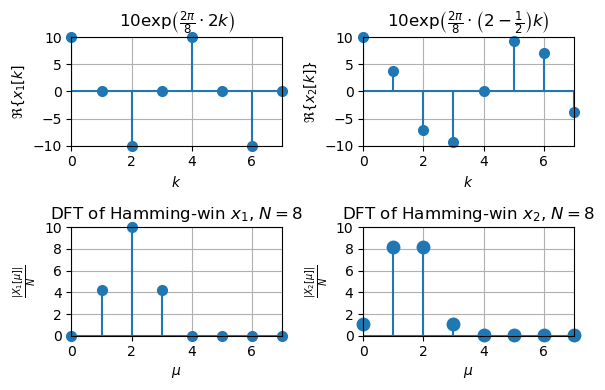

In [34]:
N = 8
k = np.arange(0, N, 1)
x1 = 10*np.exp(1j*np.pi/2*k)
x2 = 10*np.exp(1j*np.pi/4*(2-1/2)*k)
Beta = 21/25
whamming = (1-Beta)+Beta*(1-np.cos(2*np.pi/N*(k+1/2)))
X1 = np.fft.fft(x1*whamming)
X2 = np.fft.fft(x2*whamming)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2, nrows=2, figsize=(6, 4))
ax1.stem(k, np.real(x1), basefmt='C0', markerfmt='none')
ax1.plot(k, np.real(x1), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax1.set_xticks(np.arange(0, N, 2))
ax1.set_yticks(np.arange(-10, 11, 5))
ax1.grid(True)
ax1.set_xlim(0, N-1)
ax1.set_ylim(-10, 10)
ax1.set_title(r'$10\mathrm{exp}\left(\frac{2\pi}{8}\cdot 2k\right)$')
ax1.set_xlabel('$k$')
ax1.set_ylabel('$\Re\{x_1[k]}$')
ax2.stem(k, np.real(x2), basefmt='C0', markerfmt='none')
ax2.plot(k, np.real(x2), ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax2.set_xticks(np.arange(0, N, 2))
ax2.set_yticks(np.arange(-10, 11, 5))
ax2.set_xlim(0, N-1)
ax2.set_ylim(-10, 10)
ax2.grid(True)
ax2.set_title(
    r'$10\mathrm{exp}\left(\frac{2\pi}{8}\cdot \left(2-\frac{1}{2}\right)k\right)$')
ax2.set_xlabel('$k$')
ax2.set_ylabel('$\Re\{x_2[k]\}$')
ax3.stem(k, np.abs(X1)/N, basefmt='C0', markerfmt='none')
ax3.plot(k, np.abs(X1)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=7, clip_on=False)
ax3.set_xticks(np.arange(0, N, 2))
ax3.set_yticks(np.arange(0, 11, 2))
ax3.set_xlim(0, N-1)
ax3.set_ylim(0, 10)
ax3.grid(True)
ax3.set_title('DFT of Hamming-win $x_1$, $N=%d$' % (N))
ax3.set_xlabel('$\mu$')
ax3.set_ylabel(r'$\frac{|X_1[\mu]|}{N}$')
ax4.stem(k, np.abs(X2)/N, basefmt='C0', markerfmt='none')
ax4.plot(k, np.abs(X2)/N, ls='none', marker='o',
         mec='C0', mfc='C0', ms=9, clip_on=False)
ax4.set_xticks(np.arange(0, N, 2))
ax4.set_yticks(np.arange(0, 11, 2))
ax4.set_xlim(0, N-1)
ax4.set_ylim(0, 10)
ax4.grid(True)
ax4.set_title('DFT of Hamming-win $x_2$, $N=%d$' % (N))
ax4.set_ylabel(r'$\frac{|X_2[\mu]|}{N}$')
ax4.set_xlabel('$\mu$')
fig.tight_layout()
fig.savefig('graphics/DFTbestworstcase_HammWin.pdf')

The following code block plots the magnitude spectrum, the phase spectrum, the real part and the imaginary part for $X(\mu)=\mathrm{DTF}_N\left\{x[k]\right\}$ with $x[k]=1+3\cdot\mathrm{cos}\left(\frac{2\pi}{4}\cdot 2k\right)-2\cdot\sin\left(\frac{2\pi}{4}\cdot k\right)$, $k\in\{0,1,\dots,N-1\}$, $\mu\in\{0,1\dots,N-1\}$ and $N=4$.

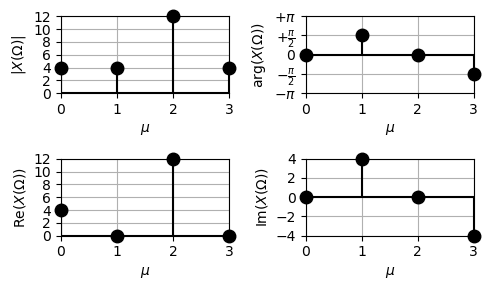

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2, ncols=2, figsize=(5, 3))
N = 4
k = np.arange(0, N)
x = -2*np.sin(2*np.pi/N*k)+3*np.cos(2*np.pi/N*2*k)+1
X = np.fft.fft(x)
ax1.stem(k, np.abs(X), basefmt='black', markerfmt='none', linefmt='black')
ax1.plot(k, np.abs(X), ls='none', marker='o',
         mec='black', mfc='black', ms=9, clip_on=False)
ax1.set_xticks(np.arange(0, N, 1))
ax1.set_yticks(np.arange(0, 13, 2))
ax1.set_xlim(0, N-1)
ax1.set_ylim(0, 12)
ax1.set_xlabel('$\mu$')
ax1.set_ylabel('$|X(\Omega)|$')
ax1.grid(True)
ax2.stem(k, np.angle(X), basefmt='black', markerfmt='none', linefmt='black')
ax2.plot(k, np.angle(X), ls='none', marker='o',
         mec='black', mfc='black', ms=9, clip_on=False)
ax2.set_xticks(np.arange(0, N, 1))
ax2.set_yticks(np.arange(-np.pi, np.pi+0.1, np.pi/2))
ax2.set_yticklabels(
    ['$-\pi$', r'$-\frac{\pi}{2}$', '$0$', r'$+\frac{\pi}{2}$', '$+\pi$'])
ax2.set_xlim(0, N-1)
ax2.set_ylim(-np.pi, np.pi)
ax2.set_xlabel('$\mu$')
ax2.set_ylabel(r'$\mathrm{arg}\left(X(\Omega)\right)$')
ax2.grid(True)
ax3.stem(k, np.real(X), basefmt='black', markerfmt='none', linefmt='black')
ax3.plot(k, np.real(X), ls='none', marker='o',
         mec='black', mfc='black', ms=9, clip_on=False)
ax3.set_xticks(np.arange(0, N, 1))
ax3.set_yticks(np.arange(0, 13, 2))
ax3.set_xlim(0, N-1)
ax3.set_ylim(0, 12)
ax3.set_xlabel('$\mu$')
ax3.set_ylabel(r'$\mathrm{Re}\left(X(\Omega)\right)$')
ax3.grid(True)
ax4.stem(k, np.imag(X), basefmt='black', markerfmt='none', linefmt='black')
ax4.plot(k, np.imag(X), ls='none', marker='o',
         mec='black', mfc='black', ms=9, clip_on=False)
ax4.set_xticks(np.arange(0, N, 1))
ax4.set_yticks(np.arange(-4, 5, 2))
ax4.set_xlim(0, N-1)
ax4.set_ylim(-4, 4)
ax4.set_xlabel('$\mu$')
ax4.set_ylabel(r'$\mathrm{Im}\left(X(\Omega)\right)$')
ax4.grid(True)
fig.tight_layout()
fig.savefig('graphics/UE1_Exercise2_IDFT.pdf')

The following code block plots the logarithmic amplitude spectrum and the phase spectrum for $H[\mu]$ = $\mathrm{DTF}_N\left\{h[k]\right\}$ and the interpolated DTFT with $h[k]=\frac{1}{8}\cdot\left(11\cdot\delta[k]-5\cdot\delta[k-1]+7\cdot\delta[k-2]-9\cdot\delta[k-3]\right)$, $k\in\{0,\dots,N-1\}$, $\mu\in\{0,\dots,N-1\}$ and $N=4$.

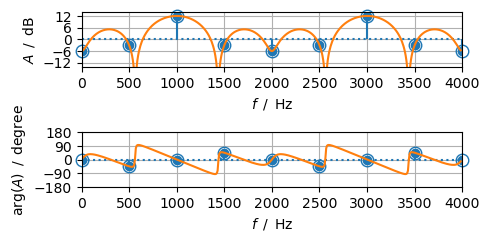

In [36]:
x = np.array([11, -5, 7, -9])/8
X = np.fft.fft(x)
df = 500
fmax = 4000
fs = 2000
f = np.arange(0, fmax+df, df)
Omega_int = np.arange(0, 4*np.pi-np.pi/128, np.pi/128)
X_DTFT = interpolate_DTFT(X, Omega_int)
X = np.append(X, np.append(X, np.array([X[0]])))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 2.5))
ax1.stem(f, 20*np.log10(np.abs(X)), basefmt='C0:',
         linefmt='C0', markerfmt='C0o')
ax1.plot(f, 20*np.log10(np.abs(X)), ls='none', marker='o',
         mec='C0', mfc='none', ms=9, clip_on=False)
ax1.plot(Omega_int/(2*np.pi)*fs, 20*np.log10(np.abs(X_DTFT)), color='C1')
ax1.set_xticks(np.arange(0, fmax+1, df))
ax1.set_yticks(np.arange(-12, 13, 6))
ax1.set_xlim(0, 4000)
ax1.set_ylim(-14, 14)
ax1.set_ylabel('$A\enspace/\enspace\mathrm{dB}$')
ax1.set_xlabel('$f\enspace/\enspace\mathrm{Hz}$')
ax1.grid(True)
ax2.stem(f, np.angle(X)*180/np.pi, basefmt='C0:',
         linefmt='C0', markerfmt='C0o')
ax2.plot(f, np.angle(X)*180/np.pi, ls='none', marker='o',
         mec='C0', mfc='none', ms=9, clip_on=False)
ax2.plot(Omega_int/(2*np.pi)*fs, np.angle(X_DTFT)*180/np.pi, color='C1')
ax2.set_xticks(np.arange(0, fmax+1, df))
ax2.set_yticks(np.arange(-180, 181, 90))
ax2.set_xlim(0, 4000)
ax2.set_ylim(-180, 180)
ax2.set_ylabel('$\mathrm{arg}(A)\enspace/\enspace \mathrm{degree}$')
ax2.set_xlabel('$f\enspace/\enspace\mathrm{Hz}$')
ax2.grid(True)
fig.tight_layout()
fig.savefig('graphics/UE1_Exercise4_Spectrum.pdf')

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises